In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [13]:
import pandas as pd

# 1
df = pd.read_excel("/content/bank.xlsx")

# 2
df.info()
obj_cols = df.select_dtypes(include='object').columns
print(obj_cols)
for col in obj_cols:
    print(col, df[col].unique())
print(df.isnull().sum())

# 3
df_num = df.drop(columns=obj_cols)
df_num.to_csv("banknumericdata.csv", index=False)

# 4
df_new = pd.read_csv("banknumericdata.csv")
print(df_new.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Age      6 non-null      int64 
 1   Job      6 non-null      object
 2   Balance  6 non-null      int64 
 3   y        6 non-null      object
dtypes: int64(2), object(2)
memory usage: 324.0+ bytes
Index(['Job', 'y'], dtype='object')
Job ['Teacher' 'Worker' 'Receptionist' 'Singer' 'Trainer' 'Swimmer']
y ['no' 'yes']
Age        0
Job        0
Balance    0
y          0
dtype: int64
             Age      Balance
count   6.000000      6.00000
mean   28.500000  18700.00000
std     5.319774  15172.07962
min    21.000000   1800.00000
25%    25.500000   6050.00000
50%    28.500000  19250.00000
75%    31.500000  27500.00000
max    36.000000  40000.00000


In [16]:
import pandas as pd

df = pd.read_excel("/content/Medical_student.xlsx")

df.info()
print(df.isnull().sum())

# 3 – imputations
# Example: numeric → mean, categorical → mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype != 'object':
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

# 4 – duplicates
print(df.duplicated().sum())
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      5 non-null      object
 1   Semester  5 non-null      int64 
 2   Grades    5 non-null      int64 
 3   Address   4 non-null      object
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes
Name        0
Semester    0
Grades      0
Address     1
dtype: int64
0


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_excel("/content/titanic.xlsx")




In [22]:
sub = titanic[['Name','Pclass','Sex','Age','Fare','Survived']]
sub = sub[sub['Pclass'] == 1]

print(sub['Fare'].mean())
print(sub['Fare'].median())
print(sub['Fare'].max())
print(sub['Fare'].min())


44333.333333333336
23000.0
100000
10000


In [23]:
print(sub['Age'].isnull().sum())
sub = sub.dropna(subset=['Age'])


0


In [24]:
emb = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic = pd.concat([titanic, emb], axis=1)
titanic = titanic.drop(columns=['Embarked'])
print(titanic.head())


   Name  Pclass Sex  Age    Fare Survived  Embarked_C  Embarked_Q  Embarked_S
0  Rose     1.0   F   23   23000        y        True       False       False
1  Jack     0.0   M   25    2300        n       False        True       False
2  Sean     0.5   M   24   10000        y       False       False        True
3   Jen     1.0   F   32  100000        y       False       False        True
4    JB     1.0   M   65   10000        y        True       False       False


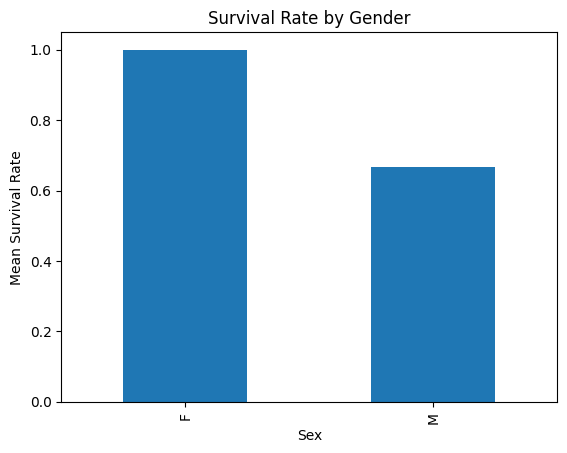

In [29]:
titanic['Survived'] = titanic['Survived'].map({'y': 1, 'n': 0})

titanic.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()



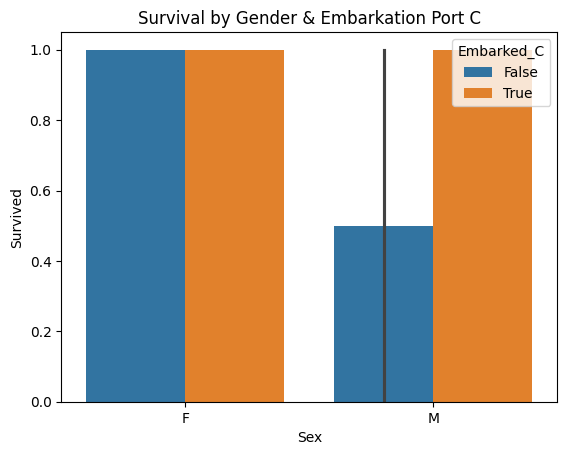

In [31]:
import seaborn as sns

sns.barplot(data=titanic, x='Sex', y='Survived', hue='Embarked_C')
plt.title("Survival by Gender & Embarkation Port C")
plt.show()